In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("melb_data.csv")
df.head(3)

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df.corr()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Unnamed: 0,1.000000,0.063194,-0.071270,0.267349,0.104123,0.103046,0.042097,0.090104,0.019722,0.009144,0.135943,0.027710,0.063147,0.011893
Rooms,0.063194,1.000000,0.496430,0.286978,0.063034,0.948740,0.597444,0.413361,0.022078,0.085001,-0.060499,0.020552,0.093679,-0.091052
Price,-0.071270,0.496430,1.000000,-0.169775,0.098790,0.474864,0.463762,0.237924,0.032847,0.064925,-0.324032,-0.203864,0.196774,-0.051254
Distance,0.267349,0.286978,-0.169775,1.000000,0.443318,0.294835,0.130633,0.260462,0.019901,0.063430,0.250276,-0.133610,0.233683,-0.062188
Postcode,0.104123,0.063034,0.098790,0.443318,1.000000,0.064956,0.114387,0.056131,0.019658,0.034861,0.044442,-0.384394,0.432472,0.044277
Bedroom2,0.103046,0.948740,0.474864,0.294835,0.064956,1.000000,0.589968,0.410400,0.024537,0.092354,-0.048461,0.018331,0.097365,-0.080201
Bathroom,0.042097,0.597444,0.463762,0.130633,0.114387,0.589968,1.000000,0.325783,0.035302,0.089820,0.156365,-0.064866,0.117296,-0.050420
Car,0.090104,0.413361,0.237924,0.260462,0.056131,0.410400,0.325783,1.000000,0.025569,0.068575,0.106709,-0.003947,0.063873,-0.023414
Landsize,0.019722,0.022078,0.032847,0.019901,0.019658,0.024537,0.035302,0.025569,1.000000,0.094097,0.032967,0.009214,0.009750,-0.006108
BuildingArea,0.009144,0.085001,0.064925,0.063430,0.034861,0.092354,0.089820,0.068575,0.094097,1.000000,0.019136,0.029779,-0.016133,-0.018071


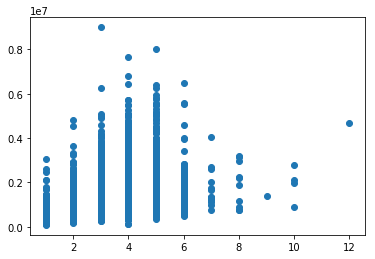

In [5]:
plt.scatter(df.Rooms,df.Price)

In [16]:
df.Rooms.fillna(df.Rooms.median(), inplace=True)
df.Distance.fillna(df.Distance.median(), inplace=True)
df.Landsize.fillna(df.Landsize.median(), inplace = True)
df.BuildingArea.fillna(df.BuildingArea.median(), inplace=True)
df.Price.fillna(df.Price.median(), inplace=True)
F=['Rooms','Distance']
X=pd.DataFrame(df[F])
y=df["Price"]

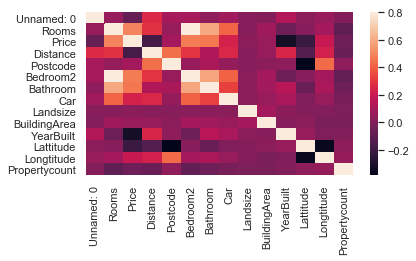

In [17]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(6, 3))
sns.heatmap(corrmat, vmax=.8, square=False);

C:\Users\asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


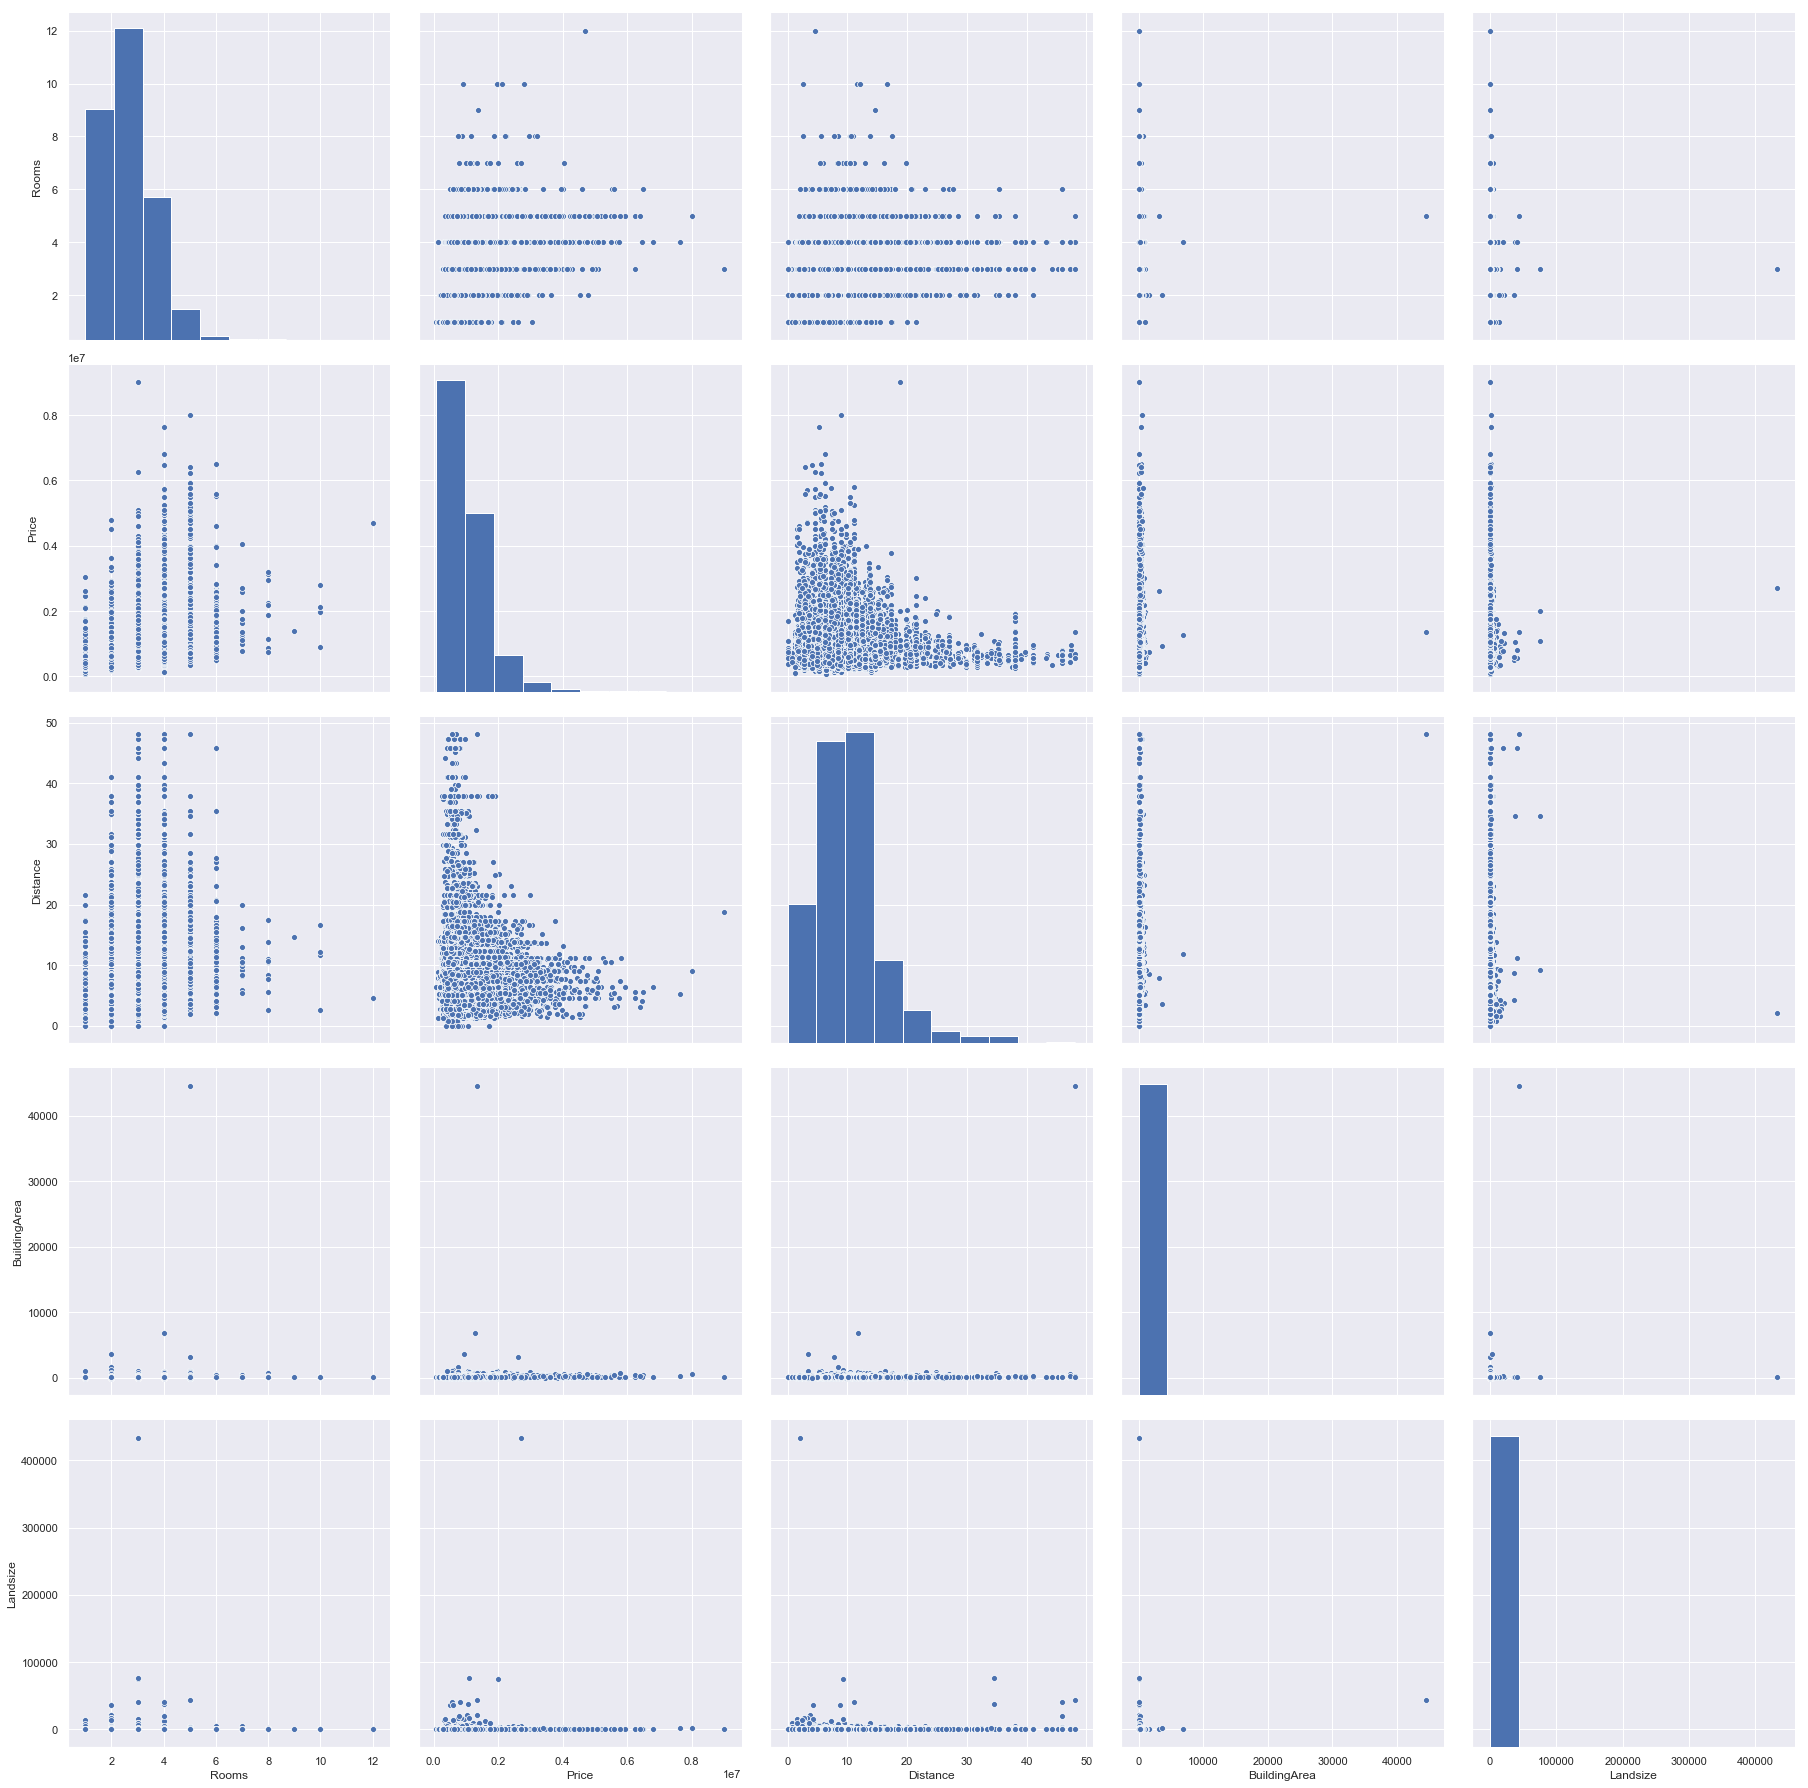

In [18]:
sns.set()
cols = ['Rooms', 'Price', 'Distance', 'BuildingArea', 'Landsize']
sns.pairplot(df[cols], size = 5)
plt.show();

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
regg = LinearRegression()
regg.fit(X_train, y_train)
y_predictions = regg.predict(X_test)
print("R: %s" % regg.score(X_test,y_test))

R: 0.3532962007360254


In [20]:
scores = cross_val_score(regg, X, y, cv=5)
print(scores)

[0.36659373 0.35196589 0.32985484 0.31888259 0.31766775]


In [21]:
data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [22]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test.reshape(-1, 1))
reggx = SGDRegressor(loss='squared_loss')
scores=cross_val_score(reggx, X_train, y_train, cv=5)
reggx.fit(X_train, y_train)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [28]:
print('Final Scores : %s'% scores)
print('Mean Score : %s'% np.mean(scores))
print('Regg Scores : %s'% reggx.score(X_test, y_test))

Final Scores : [0.71423814 0.55006796 0.6141424  0.78879902 0.77532498]
Mean Score : 0.6885145012454703
Regg Scores : 0.7322114519500775
